In [626]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

data = pd.read_csv("train.csv")
le = LabelEncoder()

data = data.head(25000)

dict = {
    "January" : 1,
    "February" : 2,
    "March" : 3,
    "April" : 4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
}

data["Month"] = data["Month"].map(dict)

data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [627]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        2492
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3750
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2840
Delay_from_due_date            0
Num_of_Delayed_Payment      1769
Changed_Credit_Limit           0
Num_Credit_Inquiries         493
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2310
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1099
Payment_Behaviour              0
Monthly_Balance              312
Credit_Score                   0
dtype: int64

In [628]:
data.describe()

,Month,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,25000.000000,21250.000000,25000.00000,25000.000000,25000.000000,25000.000000,24507.000000,25000.000000,25000.000000
mean,4.500000,4232.601588,16.71532,23.294240,67.908400,21.154680,25.912188,32.288799,1425.303897
std,2.291334,3193.265223,114.92854,131.690911,445.411394,14.711657,182.543043,5.139636,8423.712668
min,1.000000,333.596667,0.00000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,2.750000,1654.615000,3.00000,4.000000,7.000000,10.000000,3.000000,28.015312,30.305498
50%,4.500000,3124.596888,6.00000,6.000000,13.000000,18.000000,6.000000,32.310264,68.785100
75%,6.250000,6034.680000,8.00000,7.000000,20.000000,28.000000,9.000000,36.529522,165.818860
max,8.000000,14866.446667,1798.00000,1498.000000,5788.000000,67.000000,2594.000000,50.000000,82256.000000


In [629]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [630]:
def remove_underscore(col):
    data[col] = data[col].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    data[col] = pd.to_numeric(data[col], errors="coerce")


data["Num_of_Loan"].fillna("-100")
data["Num_of_Delayed_Payment"].fillna("-1")



remove_underscore("Age")
remove_underscore("Num_of_Delayed_Payment")
remove_underscore("Changed_Credit_Limit")
remove_underscore("Outstanding_Debt")
remove_underscore("Amount_invested_monthly")
remove_underscore("Monthly_Balance")

In [631]:
dict = {
    'High_spent_Small_value_payments' : 0,
       'Low_spent_Large_value_payments' : 1,
       'Low_spent_Medium_value_payments' : 2,
       'Low_spent_Small_value_payments' : 3,
       'High_spent_Medium_value_payments' : 4, 
       '!@9#%8' : np.nan,
       'High_spent_Large_value_payments': 5}

data['Payment_Behaviour'] = data['Payment_Behaviour'].map(dict)

data["Payment_Behaviour"].describe()


count    23169.000000
mean         2.732358
std          1.558806
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Payment_Behaviour, dtype: float64

In [632]:
def find_mean(i, col):
    mean = 0
    j = i
    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating)or np.issubdtype(type(value), np.integer)):
            mean += float(value)
        j += 1
    return mean / 8


def find_mode(i, col):
    mode = {}
    j = i

    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating) or (np.issubdtype(type(value), np.integer) and value > 0)):
            if data.at[j, col] in mode:
                mode[value] += 1
            else:
                mode[value] = 1
        j += 1

    return max(mode, key=mode.get)

def date_to_int(value):
    year = []
    month = []
    i = 0
    flag = 0

    for char in value:
        if char.isnumeric() and not flag:
            year.append(char)
        else:
            flag = 1
        
        if char.isnumeric() and flag:
            month.append(char)

    result = result = int(''.join(map(str, year))) * 12 +  int(''.join(map(str, month)))

    return result


In [633]:
def fill_missing(i,col,condition):
     index = []
     j = i
     valid = ''
     while (j != i + 8):
         if condition(j,col):
             index.append(j)
         else:
             valid = data.at[j,col]
         j+=1
     for k in index:
         data.at[k,col] = valid

def fill_with_mean(i,col,condition):
    mean = find_mean(i,col)
    j = i
    while (j != i + 8):
         if condition(j,col):
            data.at[j,col] = mean
         j+=1

def fill_with_mode(i,col,condition):
        mode = find_mode(i,col)
        j = i
        while (j != i + 8):
             if condition(j,col):
                data.at[j,col] = mode
             j+=1

def transform_dates(i):
    j = i
    while(j != i + 8):
        data.at[j, "Credit_History_Age"] = date_to_int(data.at[j, "Credit_History_Age"])
        j += 1

In [634]:
def find_missing():
    for i, row in data.iterrows():
        if i % 8 == 0:
            fill_missing(i, "Name", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Occupation", lambda j, col: "__" in data.at[j, col])
            fill_missing(i, "Credit_Mix", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Annual_Income", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Type_of_Loan", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Num_of_Loan", lambda j, col: "-" in data.at[j, col])
            fill_missing(i, "SSN", lambda j, col: "#" in data.at[j, col])
            fill_missing(i, "Credit_History_Age", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Changed_Credit_Limit", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Monthly_Inhand_Salary", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Delay_from_due_date", lambda j, col: data.at[j, col] < 0)
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Amount_invested_monthly", lambda j, col: data.at[j, col] == 10_000 or pd.isna(data.at[j,col]))
            fill_with_mean(i, "Monthly_Balance", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i,"Num_Credit_Inquiries",lambda j, col: pd.isna(data.at[j, col]),)
            fill_with_mean(i, "Payment_Behaviour", lambda  j, col: pd.isna(data.at[j, col]))
            fill_with_mode(i, "Age", lambda j, col: "-" in str(data.at[j, col]))
            transform_dates(i)


find_missing()

data["Payment_Behaviour"].describe()

count    25000.000000
mean         2.694780
std          1.515364
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Payment_Behaviour, dtype: float64

In [635]:
remove_underscore("Num_of_Loan")
remove_underscore("Annual_Income")

In [636]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID', 'Occupation']

In [637]:
data["Occupation"] = le.fit_transform(data["Occupation"])
data["Credit_Mix"] = le.fit_transform(data["Credit_Mix"])
data["Payment_of_Min_Amount"] = le.fit_transform(data["Payment_of_Min_Amount"])
data["Credit_Score"] = le.fit_transform(data["Credit_Score"])

data.drop("ID", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Customer_ID", axis=1, inplace=True)
data.drop("SSN", axis=1, inplace=True)
data.drop("Type_of_Loan", axis=1, inplace=True)
# data.drop("Payment_Behaviour", axis=1, inplace=True)

In [638]:
data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000
mean,4.500000,115.657800,7.043200,1.711670e+05,4062.870228,16.71532,23.294240,67.908400,6.928760,21.172480,27.916490,10.285974,25.828785,1.205440,1414.025712,32.288799,1.407680,1425.303897,280.930233,2.694780,-1.333333e+22,1.352560
std,2.291334,685.428173,4.289577,1.377785e+06,3115.425702,114.92854,131.690911,445.411394,58.949881,14.685355,198.724623,6.762038,180.958185,0.804823,1171.171164,5.139636,0.693784,8423.712668,425.527325,1.515364,2.108185e+24,0.763652
min,1.000000,14.000000,0.000000,7.006520e+03,250.197500,0.00000,0.000000,1.000000,0.000000,-0.875000,-3.000000,-6.480000,0.000000,0.000000,1.480000,20.000000,0.000000,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,2.750000,25.000000,3.000000,1.962318e+04,1581.792500,3.00000,4.000000,7.000000,2.000000,10.000000,9.000000,5.256562,3.000000,1.000000,542.160000,28.015312,1.000000,30.305498,76.041106,2.000000,2.702029e+02,1.000000
50%,4.500000,33.000000,7.000000,3.798312e+04,2988.795833,6.00000,6.000000,13.000000,3.000000,18.000000,14.000000,9.240000,5.812500,1.000000,1145.900000,32.310264,2.000000,68.785100,139.192837,3.000000,3.365562e+02,2.000000
75%,6.250000,42.000000,11.000000,7.373992e+04,5845.048333,8.00000,7.000000,20.000000,5.000000,28.000000,18.000000,14.630000,9.000000,2.000000,1913.060000,36.529522,2.000000,165.818860,278.140274,4.000000,4.689921e+02,2.000000
max,8.000000,8674.000000,14.000000,2.418881e+07,14866.446667,1798.00000,1498.000000,5788.000000,1485.000000,67.000000,4311.000000,36.970000,2594.000000,2.000000,4998.070000,50.000000,2.000000,82256.000000,5029.942152,5.000000,1.602041e+03,2.000000


<Axes: ylabel='count'>

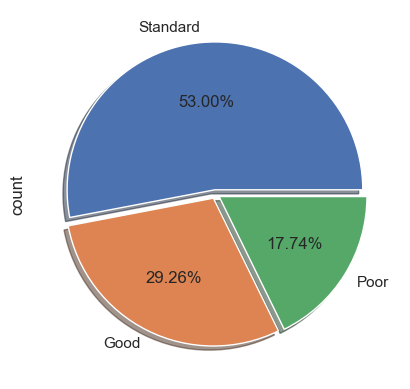

In [639]:
data["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Good","Poor"])

In [640]:
data["Payment_Behaviour"].describe()

count    25000.000000
mean         2.694780
std          1.515364
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Payment_Behaviour, dtype: float64

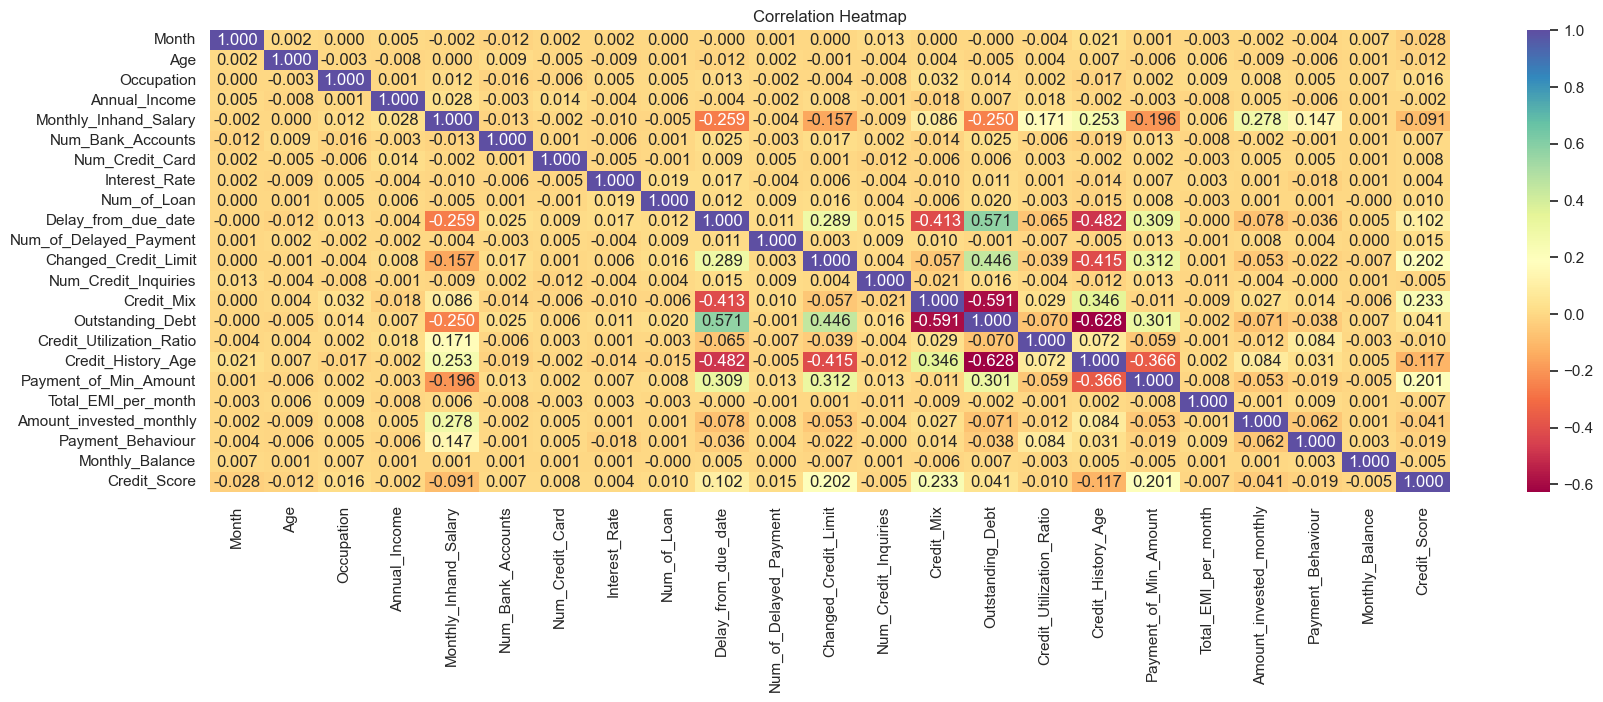

In [641]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")


show_heat_map(data)

In [642]:
def show_outliers(data,col, edge):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    sns.stripplot(y=col, data=data[data[col] < edge], ax=axs[0])
    axs[0].set_title(f"{col} < {edge}")
    sns.stripplot(y=col, data=data[data[col] > edge], ax=axs[1])
    axs[1].set_title(f"{col} > {edge}")

In [643]:
def outlier_one(data):
    show_outliers(data,"Age", 56)
    show_outliers(data,"Num_Bank_Accounts", 11)
    show_outliers(data,"Num_Credit_Card", 15)
    show_outliers(data,"Interest_Rate", 35)

In [644]:
def outlier_two(data):
    show_outliers(data,"Num_of_Loan", 10)
    show_outliers(data,"Num_of_Delayed_Payment", 30)
    show_outliers(data,"Num_Credit_Inquiries",27)
    show_outliers(data,"Monthly_Balance",1e-22)

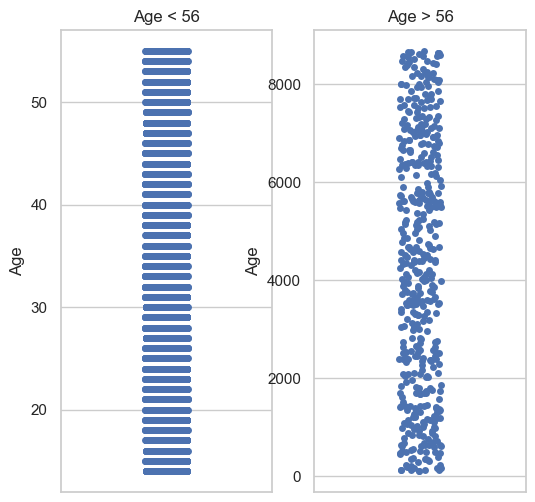

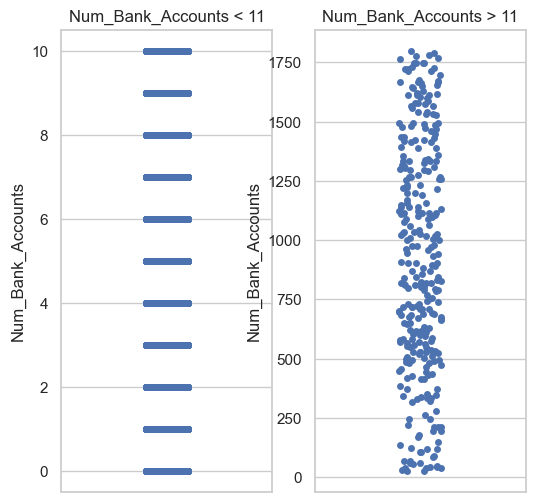

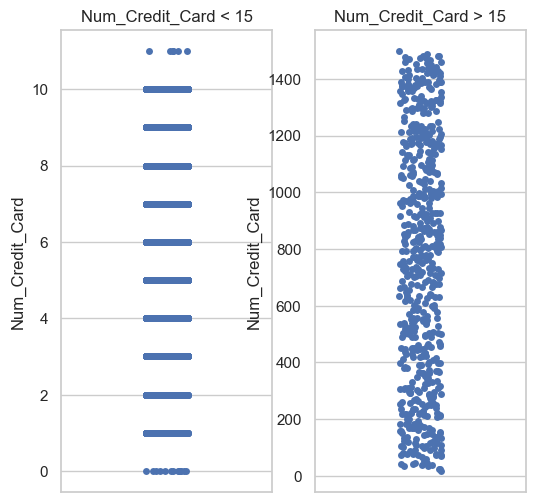

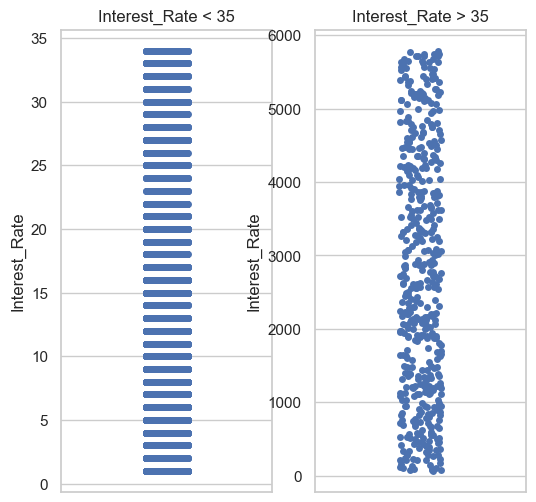

In [645]:
outlier_one(data)

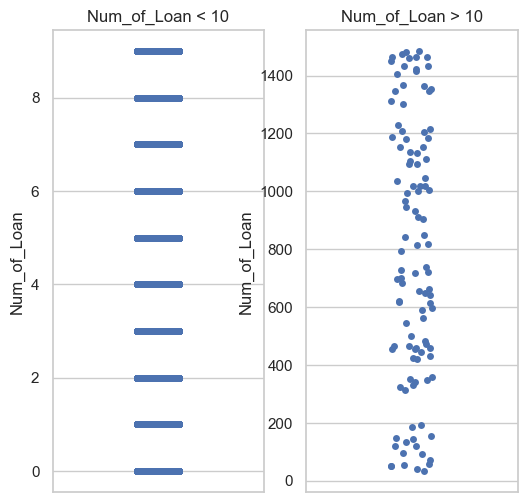

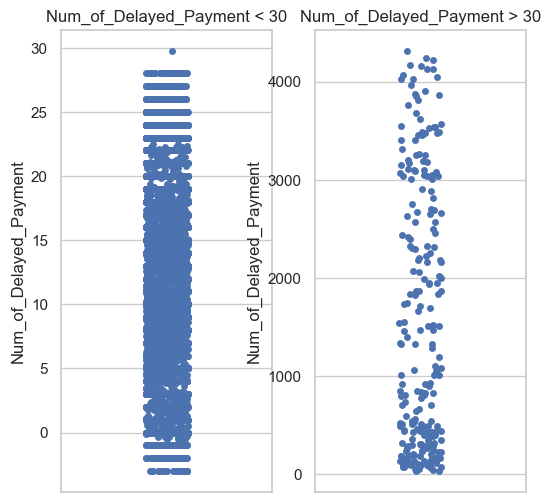

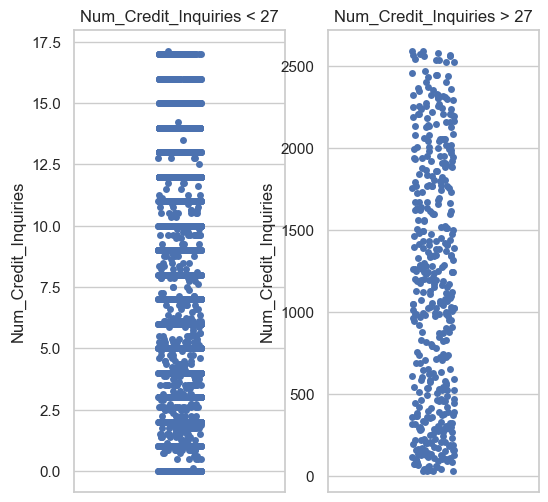

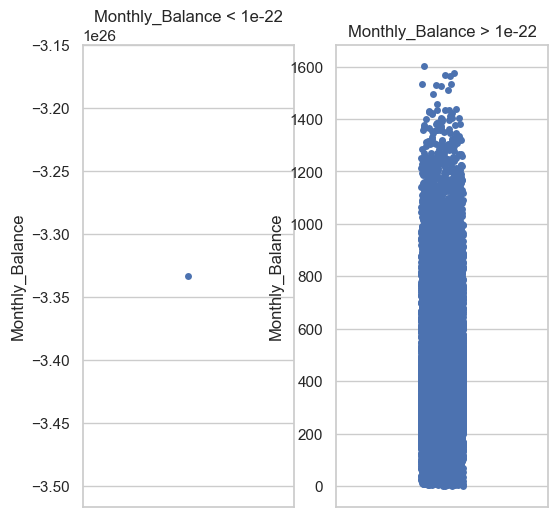

In [646]:
outlier_two(data)

In [647]:
new_data = data.copy()

cols = [
    "Age",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]


#Replace 
for col in cols:
    q1, q3 = np.percentile(new_data[col], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers_mask = (new_data[col] < lower_bound) | (new_data[col] > upper_bound)
    new_data = new_data[~outliers_mask]

new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,20715.000000,20715.000000,20715.000000,2.071500e+04,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000,20715.000000
mean,4.500941,33.112334,7.080425,1.669718e+05,3575.196917,5.504272,5.627323,14.914168,3.745354,21.867934,13.536966,10.518221,6.007416,1.196379,1473.463677,31.981109,1.436785,1420.960713,276.958364,2.597834,355.740662,1.367463
std,2.289710,10.637831,4.290267,1.396431e+06,2634.052652,2.587658,2.061113,8.878237,2.429063,14.902176,6.200024,6.851349,3.919700,0.826306,1195.313733,5.020107,0.696547,8417.404502,424.217013,1.470849,141.482732,0.750297
min,1.000000,14.000000,0.000000,7.006520e+03,250.197500,0.000000,0.000000,1.000000,0.000000,-0.875000,-3.000000,-6.310000,0.000000,0.000000,1.480000,20.000000,0.000000,0.000000,0.000000,0.000000,0.453456,0.000000
25%,2.000000,24.000000,3.000000,1.892472e+04,1515.940000,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.410000,3.000000,0.000000,577.850000,27.753948,1.000000,30.907553,72.765234,1.875000,265.547475,1.000000
50%,5.000000,33.000000,7.000000,3.486112e+04,2785.905833,6.000000,6.000000,14.000000,3.000000,19.000000,14.000000,9.450000,6.000000,1.000000,1200.590000,31.974281,2.000000,67.461632,133.288351,3.000000,324.637730,2.000000
75%,6.000000,41.000000,11.000000,6.456052e+04,5091.725000,8.000000,7.000000,20.000000,6.000000,29.000000,18.000000,15.060000,9.000000,2.000000,2037.640000,36.232339,2.000000,160.229859,271.588984,4.000000,424.329484,2.000000
max,8.000000,56.000000,14.000000,2.418881e+07,14866.446667,10.000000,11.000000,34.000000,9.000000,67.000000,29.750000,36.970000,17.125000,2.000000,4998.070000,43.726885,2.000000,82256.000000,5029.942152,5.000000,767.338269,2.000000


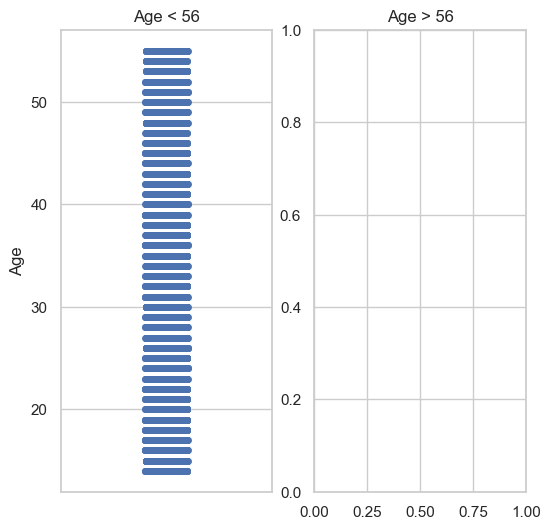

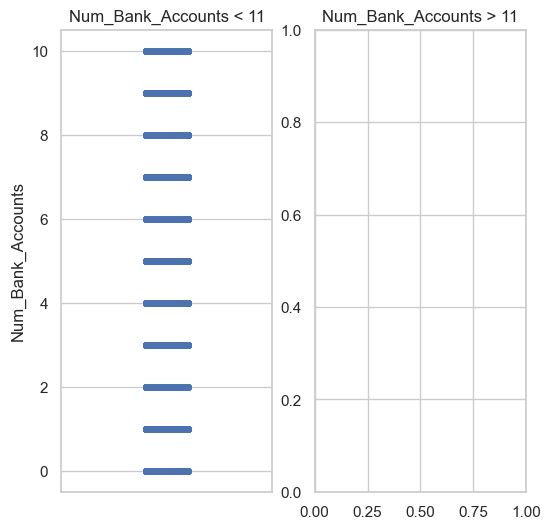

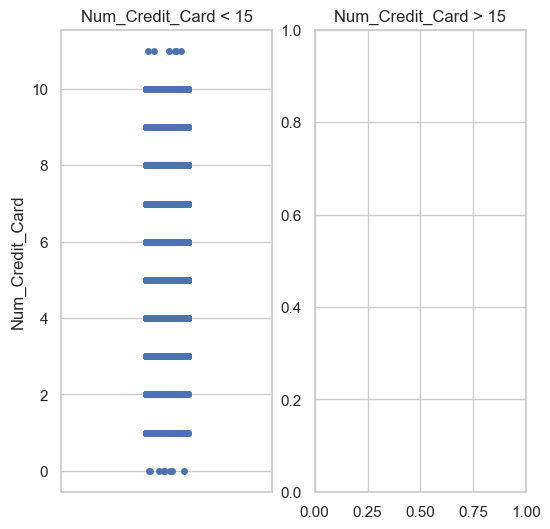

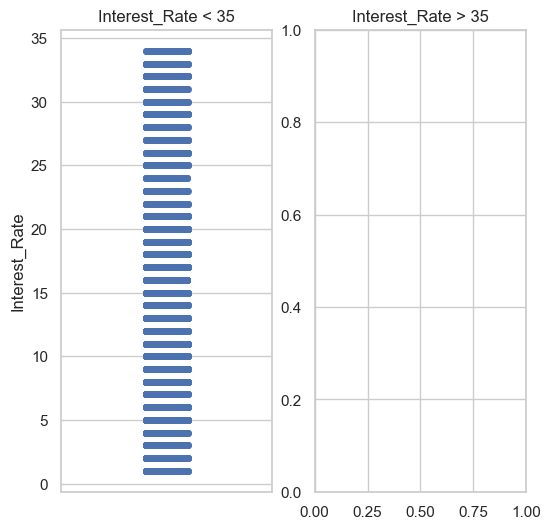

In [648]:
outlier_one(new_data)

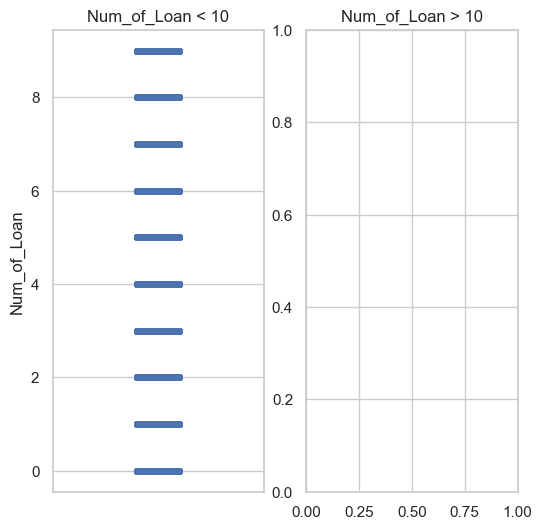

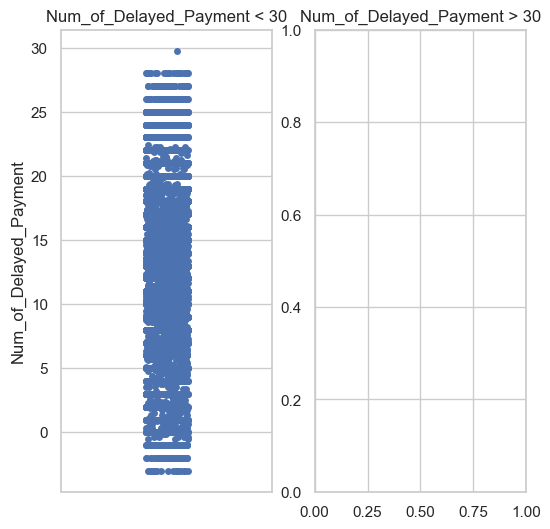

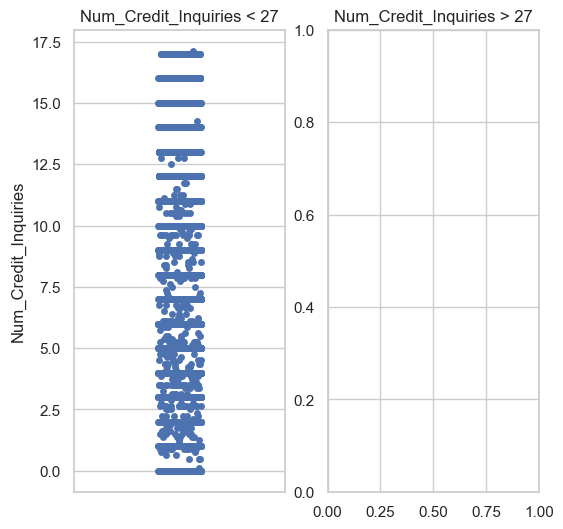

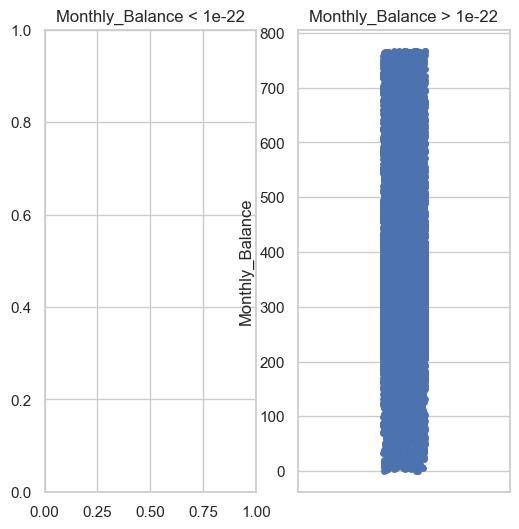

In [649]:
outlier_two(new_data)

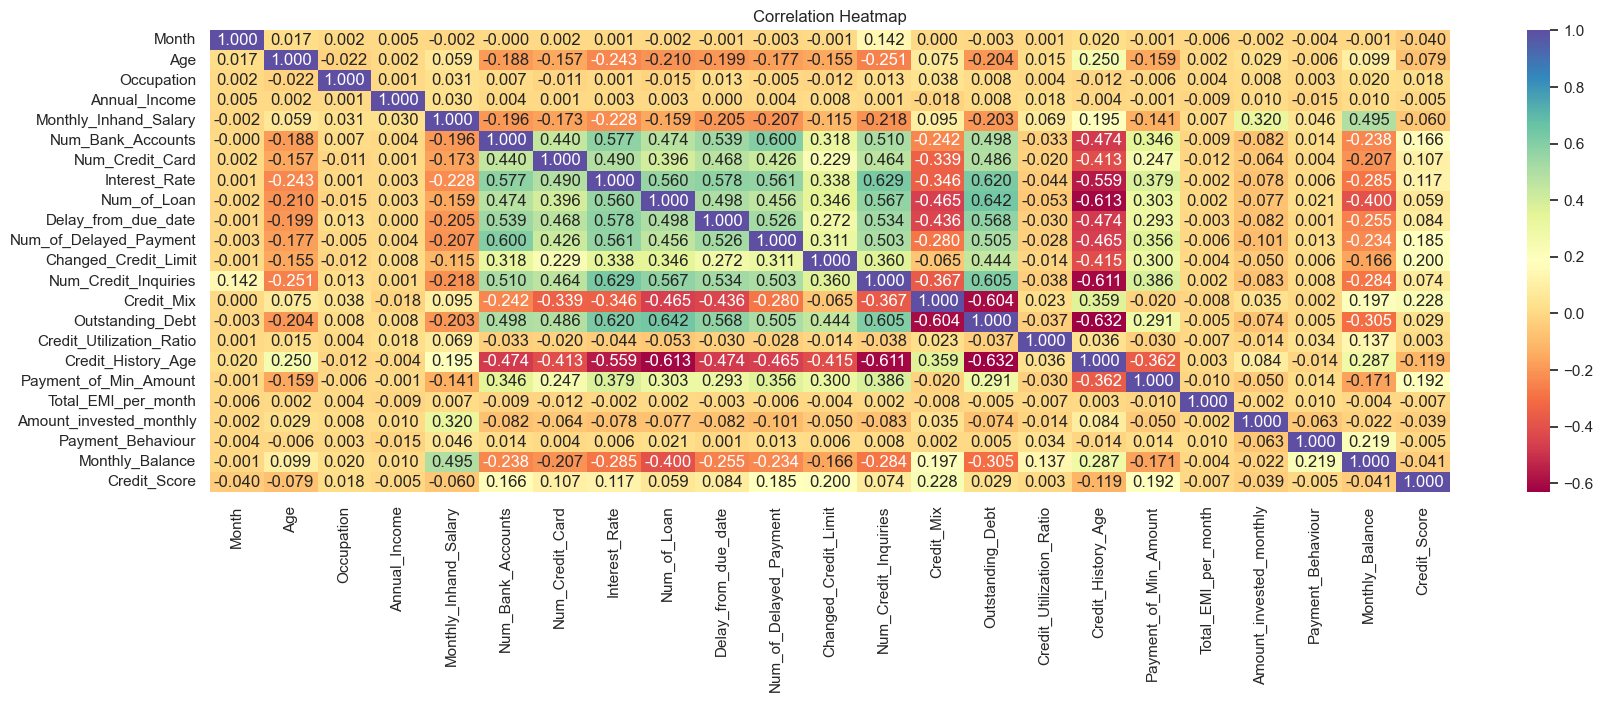

In [650]:
show_heat_map(new_data)

In [651]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y = new_data["Credit_Score"]
X = new_data.drop("Credit_Score", axis=1)
X, y = sampler.fit_resample(X, y)

new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<Axes: ylabel='count'>

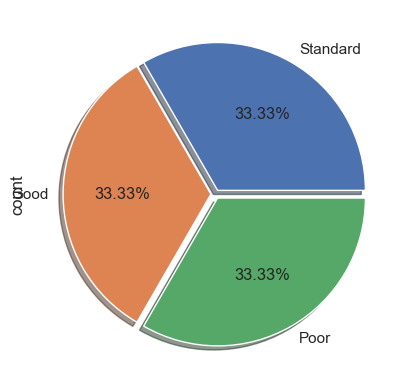

In [652]:
new_data["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Good", "Poor"],
)

In [653]:
new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,33105.000000,33105.000000,33105.000000,3.310500e+04,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000,33105.000000
mean,4.552575,33.652016,7.056517,1.642430e+05,3697.887792,5.213412,5.439420,14.031536,3.585380,20.666444,12.780022,9.806600,5.712676,1.124241,1412.948389,31.969761,1.355928,1433.258476,286.690242,2.597636,360.632700,1.000000
std,2.275032,10.814212,4.268979,1.362555e+06,2728.447213,2.692836,2.144327,9.094456,2.403684,15.063065,6.476035,6.698219,3.940900,0.773262,1160.314408,5.022704,0.689437,8419.762496,427.822582,1.476760,143.944307,0.816509
min,1.000000,14.000000,0.000000,7.006520e+03,250.197500,0.000000,0.000000,1.000000,0.000000,-0.875000,-3.000000,-6.310000,0.000000,0.000000,1.480000,20.000000,0.000000,0.000000,0.000000,0.000000,0.453456,0.000000
25%,3.000000,25.000000,3.000000,1.945751e+04,1564.176667,3.000000,4.000000,6.000000,2.000000,9.000000,8.000000,4.840000,2.250000,1.000000,556.930000,27.722687,1.000000,30.576085,74.732414,1.875000,267.802676,0.000000
50%,5.000000,34.000000,7.000000,3.551898e+04,2852.796667,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,8.830000,5.000000,1.000000,1161.100000,31.945859,1.000000,67.413314,137.338407,3.000000,330.086883,1.000000
75%,7.000000,42.000000,11.000000,6.742682e+04,5240.490000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,13.710000,9.000000,2.000000,1921.030000,36.262650,2.000000,161.844011,286.559287,4.000000,431.805695,2.000000
max,8.000000,56.000000,14.000000,2.418881e+07,14866.446667,10.000000,11.000000,34.000000,9.000000,67.000000,29.750000,36.970000,17.125000,2.000000,4998.070000,43.726885,2.000000,82256.000000,5029.942152,5.000000,767.338269,2.000000


In [654]:
result_list = {"Lasso" : [], "chi2" : [],"MIC" : [],"Ridge" : [],"RFE" : [],"PCA" : [], "MaxVoting" : [], "Stacking" : []}

def calculate(y_test, y_pred, method_name, num_of_features, model_name):
    
    result_list[method_name].append({
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1" : f1_score(y_test, y_pred, average='weighted'),
        "recall" : recall_score(y_test, y_pred, average='weighted'), 
        "precision" :  precision_score(y_test, y_pred, average='weighted'),
        "number_of_features" : num_of_features, 
        "model_name" : model_name,
        })

In [655]:
X = new_data.drop("Credit_Score", axis=1)
y = new_data["Credit_Score"]

In [656]:
def fit_model(X_selected, y,method_name ,model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    calculate(y_test, y_pred, method_name,X_selected.shape[1], model_name)

In [657]:
def lasso(X,y):
    lasso = Lasso(alpha=0.042)
    lasso.fit(X, y)
    selected = X.columns[lasso.coef_ != 0]
    return X[selected]

In [658]:
X_selected = lasso(X,y)

fit_model(X_selected,y,"Lasso",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
# fit_model(X_selected,y,"Lasso",DecisionTreeClassifier(), "DecisionTreeClassifier")
# fit_model(X_selected,y,"Lasso",GradientBoostingClassifier(), "GradientBoostingClassifier")


In [659]:
def select_kbest(X, y, method, k):
    k_best = SelectKBest(score_func=method, k=k)
    selected = k_best.fit_transform(X, y)
    return selected


scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))

for i in range(15,X.shape[1]+1):
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    # fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",DecisionTreeClassifier(), "DecisionTreeClassifier")
    # fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",GradientBoostingClassifier(), "GradientBoostingClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    # fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",DecisionTreeClassifier(), "DecisionTreeClassifier")
    # fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",GradientBoostingClassifier(), "GradientBoostingClassifier")

In [660]:
def ridge(X, y, k):
    ridge = Ridge(alpha=1)
    ridge.fit(X, y)
    feature_importance = np.abs(ridge.coef_)
    selected_feature_indices = np.argsort(feature_importance)[::-1][:k]
    X_selected = X.iloc[:, selected_feature_indices]
    return X_selected

for i in range (15,X.shape[1]+1):
    fit_model(ridge(X_min_max,y,i), y,"Ridge",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    # fit_model(ridge(X_min_max,y,i), y,"Ridge",DecisionTreeClassifier(),"DecisionTreeClassifier")
    # fit_model(ridge(X_min_max,y,i), y,"Ridge",GradientBoostingClassifier(),"GradientBoostingClassifier")


In [661]:
def RFE_feature_selection(X, y, model, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    rfe = RFE(model,n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = rfe.support_
    selected_columns = X_train.columns[selected_features]
    return  X_train[selected_columns], X_test[selected_columns], y_train,y_test


def RFE_predict(X,y,model,model_name,k):
    X_train, X_test, y_train, y_test = RFE_feature_selection(X,y,model,k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    calculate(y_test,y_pred,"RFE",X_train.shape[1],model_name)

for i in range (15,X.shape[1]+1):
    RFE_predict(X,y,RandomForestClassifier(n_jobs=-1),"RandomForestClassifier",i)
    # RFE_predict(X,y,DecisionTreeClassifier(),"DecisionTreeClassifier",i)
    # RFE_predict(X,y,GradientBoostingClassifier(),"GradientBoostingClassifier",i)

In [662]:
def PCA_feature_selection(X, k):
    pca = PCA(n_components = k)
    pca.fit(X)
    data = pca.transform(X)
    return data

for i in range(15,X.shape[1]+1):
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    # fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",DecisionTreeClassifier(),"DecisionTreeClassifier")
    # fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",GradientBoostingClassifier(),"GradientBoostingClassifier")

In [663]:
for i in result_list:
    print(result_list[i])

[{'accuracy': 0.9161758042591753, 'f1': 0.914567762253349, 'recall': 0.9161758042591753, 'precision': 0.9178059068392714, 'number_of_features': 17, 'model_name': 'RandomForestClassifier'}]
[{'accuracy': 0.9078689019785531, 'f1': 0.9055611240043677, 'recall': 0.9078689019785531, 'precision': 0.9100310834103853, 'number_of_features': 15, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.904848210240145, 'f1': 0.9023168673054957, 'recall': 0.904848210240145, 'precision': 0.9074868550128714, 'number_of_features': 16, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.9117958012384836, 'f1': 0.9094813996662777, 'recall': 0.9117958012384836, 'precision': 0.914884242015335, 'number_of_features': 17, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.9133061471076876, 'f1': 0.9111818980992674, 'recall': 0.9133061471076876, 'precision': 0.9161119191483247, 'number_of_features': 18, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.9196495997583447, 'f1': 0.9180711060524841

In [664]:
models_data = []

for model_name, model_data in result_list.items():
    for j in range(len(model_data)): 
        model_item = model_data[j]
        model_entry = {
            'method_name' : model_name,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'number_of_features': model_item["number_of_features"],
        }
        models_data.append(model_entry)

new_dataframe = pd.DataFrame(models_data)
best_method = new_dataframe[new_dataframe["accuracy"] == new_dataframe["accuracy"].max()]
new_dataframe.head()


,method_name,model_name,accuracy,f1,recall,precision,number_of_features
0,Lasso,RandomForestClassifier,0.916176,0.914568,0.916176,0.917806,17
1,chi2,RandomForestClassifier,0.907869,0.905561,0.907869,0.910031,15
2,chi2,RandomForestClassifier,0.904848,0.902317,0.904848,0.907487,16
3,chi2,RandomForestClassifier,0.911796,0.909481,0.911796,0.914884,17
4,chi2,RandomForestClassifier,0.913306,0.911182,0.913306,0.916112,18


In [665]:
new_dataframe

,method_name,model_name,accuracy,f1,recall,precision,number_of_features
0,Lasso,RandomForestClassifier,0.916176,0.914568,0.916176,0.917806,17
1,chi2,RandomForestClassifier,0.907869,0.905561,0.907869,0.910031,15
2,chi2,RandomForestClassifier,0.904848,0.902317,0.904848,0.907487,16
3,chi2,RandomForestClassifier,0.911796,0.909481,0.911796,0.914884,17
4,chi2,RandomForestClassifier,0.913306,0.911182,0.913306,0.916112,18
5,chi2,RandomForestClassifier,0.919650,0.918071,0.919650,0.921019,19
6,chi2,RandomForestClassifier,0.918743,0.916765,0.918743,0.921210,20
7,chi2,RandomForestClassifier,0.915723,0.913995,0.915723,0.917129,21
8,chi2,RandomForestClassifier,0.917686,0.915813,0.917686,0.920079,22
9,MIC,RandomForestClassifier,0.904093,0.901712,0.904093,0.906754,15


In [666]:
method_name = best_method["method_name"].to_string().split(" ")[-1]
number_of_features = int(best_method["number_of_features"].to_string().split(" ")[-1])
method_name

'RFE'

In [667]:
call_best_method = {
    "Lasso" :lambda _: lasso(X,y),
    "chi2" :lambda k: select_kbest(X_min_max,y,chi2,k),
    "MIC" : lambda k:select_kbest(X,y,mutual_info_classif,k),
    "Ridge" : lambda k: ridge(X,y,k),
    "RFE" : lambda k: RFE_feature_selection(X,y,DecisionTreeClassifier(),k),
    "PCA" : lambda k:PCA_feature_selection(X,k)
}

X_selected_features = call_best_method[method_name](number_of_features)

In [668]:
if type(X_selected_features) == tuple:
    X_train, X_test, y_train, y_test = X_selected_features
else:
    X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size= 0.2, random_state=42)


In [669]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [670]:
models = [
    ("RandomForestClassifier",RandomForestClassifier(n_jobs=-1, n_estimators=100)), 
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier(n_jobs=-1,n_neighbors=1)),
    ("ExtraTreeClassifier",ExtraTreeClassifier())
]

def max_voting():
    max_voting_model = VotingClassifier(models)
    max_voting_model.fit(X_train, y_train)
    prediction = max_voting_model.predict(X_test)

    calculate(y_test, prediction, "MaxVoting", number_of_features, "MaxVoting")

max_voting()

In [671]:
def stacking():
    stacked = StackingClassifier(estimators=models, final_estimator=RandomForestClassifier(n_estimators=150), n_jobs=-1)
    stacked.fit(X_train, y_train)
    predictions = stacked.predict(X_test)
    calculate(y_test, predictions, "Stacking", number_of_features, "Stacking")

stacking()

In [672]:
def add_to_dataframe(model, dataframe):
    models_data = []

    for j in range(len(result_list[model])): 
        model_item = result_list[model][j]
        model_entry = {
            'method_name' : model,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'number_of_features': model_item["number_of_features"],
        }
        models_data.append(model_entry)

    temp_df =  pd.DataFrame(models_data)
    dataframe = pd.concat([dataframe, temp_df], ignore_index=True)
    return dataframe

In [673]:
new_dataframe = add_to_dataframe("MaxVoting", new_dataframe)
new_dataframe = add_to_dataframe("Stacking", new_dataframe)

In [674]:
new_dataframe

,method_name,model_name,accuracy,f1,recall,precision,number_of_features
0,Lasso,RandomForestClassifier,0.916176,0.914568,0.916176,0.917806,17
1,chi2,RandomForestClassifier,0.907869,0.905561,0.907869,0.910031,15
2,chi2,RandomForestClassifier,0.904848,0.902317,0.904848,0.907487,16
3,chi2,RandomForestClassifier,0.911796,0.909481,0.911796,0.914884,17
4,chi2,RandomForestClassifier,0.913306,0.911182,0.913306,0.916112,18
5,chi2,RandomForestClassifier,0.919650,0.918071,0.919650,0.921019,19
6,chi2,RandomForestClassifier,0.918743,0.916765,0.918743,0.921210,20
7,chi2,RandomForestClassifier,0.915723,0.913995,0.915723,0.917129,21
8,chi2,RandomForestClassifier,0.917686,0.915813,0.917686,0.920079,22
9,MIC,RandomForestClassifier,0.904093,0.901712,0.904093,0.906754,15
